In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [2]:
data_x = pd.read_csv("x_under_cvd_death.csv")

In [3]:
data_x

,Unnamed: 0,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,...,0,0,0,1,0,0,0,1,1,0
1,1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,...,0,1,1,0,0,0,0,1,1,0
2,2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,...,0,1,0,1,0,0,0,1,1,0
3,3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,...,0,0,1,0,0,0,0,1,0,1
4,4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,1.10000,0.20000,0.266670,0.24242,0.40000,0.70000,0.57143,0.18182,0.27778,...,0,1,0,1,0,0,0,1,0,1
932,932,0.82500,0.16667,0.158330,0.19192,0.29167,0.53333,0.54688,0.20202,0.15833,...,0,0,0,1,0,0,0,1,0,1
933,933,0.80270,0.21892,0.162160,0.20202,0.33243,0.47027,0.70690,0.27273,0.19459,...,0,0,0,1,0,1,0,0,0,1
934,934,0.90000,0.17273,0.200000,0.22222,0.31818,0.58182,0.54688,0.19192,0.20000,...,0,1,0,1,0,0,0,1,1,0


In [8]:
data_pw = data_x.iloc[:, 1:46]

In [9]:
data_pw

,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,t_p2in_dia,...,e_div_amp,AGI,AGI_inf,AGI_mod,slope_b_c,slope_b_d,IPAD,k,CT_div_ht,SI
0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,0.14571,...,168972.3209,0.11998,-0.82484,0.25320,4.2624,4.2624,0.78580,-0.000011,0.110134,12.284675
1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,0.18072,...,587397.2693,-0.46762,-1.12600,-0.13649,8.2753,3.6847,0.30925,-0.000009,0.117351,8.193669
2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,0.23023,...,709576.2882,-1.03560,-1.56070,-0.55648,9.0299,9.0299,0.28057,-0.000010,0.092000,7.905138
3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,0.15000,...,648526.0080,-1.44110,-1.71160,-1.09080,23.3843,6.8626,0.10174,-0.000008,0.079447,6.713393
4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,0.16364,...,590555.8156,-1.63090,-1.43020,-1.44100,18.2162,8.7322,0.42060,-0.000006,0.060035,5.979467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1.10000,0.20000,0.266670,0.24242,0.40000,0.70000,0.57143,0.18182,0.27778,0.20000,...,105286.2907,-0.27262,-0.74338,-0.17278,4.4548,2.2250,0.55393,-0.000012,0.153259,8.700000
932,0.82500,0.16667,0.158330,0.19192,0.29167,0.53333,0.54688,0.20202,0.15833,0.12500,...,274172.8625,-0.70832,-0.93525,-0.57247,7.7713,5.2760,0.90317,-0.000008,0.088453,10.739785
933,0.80270,0.21892,0.162160,0.20202,0.33243,0.47027,0.70690,0.27273,0.19459,0.15405,...,433405.1291,-0.68239,-1.10500,-0.42884,9.3620,3.7810,0.24524,-0.000009,0.102633,7.217248
934,0.90000,0.17273,0.200000,0.22222,0.31818,0.58182,0.54688,0.19192,0.20000,0.17273,...,191954.8912,-0.38236,-0.91932,-0.25271,6.4851,4.6913,0.58757,-0.000010,0.104712,11.057720


In [10]:
data_pw.size

42120

In [11]:
data_pw.shape

(936, 45)

In [12]:
X = data_pw.values

In [13]:
X

array([[ 8.48570000e-01,  1.45710000e-01,  1.97140000e-01, ...,
        -1.13950000e-05,  1.10134078e-01,  1.22846750e+01],
       [ 7.15660000e-01,  1.87950000e-01,  1.80720000e-01, ...,
        -9.10540000e-06,  1.17350649e-01,  8.19366853e+00],
       [ 6.90700000e-01,  2.30230000e-01,  1.67440000e-01, ...,
        -9.54500000e-06,  9.20000000e-02,  7.90513834e+00],
       ...,
       [ 8.02700000e-01,  2.18920000e-01,  1.62160000e-01, ...,
        -9.08330000e-06,  1.02632911e-01,  7.21724831e+00],
       [ 9.00000000e-01,  1.72730000e-01,  2.00000000e-01, ...,
        -9.78330000e-06,  1.04712042e-01,  1.10577201e+01],
       [ 8.48570000e-01,  1.37140000e-01,  2.22860000e-01, ...,
        -1.27340000e-05,  1.24502793e-01,  1.30523553e+01]])

In [14]:
X.shape

(936, 45)

In [15]:
X.size

42120

In [16]:
# reading the output variable

In [17]:
data_y = pd.read_csv("y_under_cvd_death.csv")

In [18]:
data_y = data_y.drop(['Unnamed: 0'], axis=1)

In [19]:
data_y

,cvd_death
0,0
1,0
2,0
3,0
4,0
...,...
931,1
932,1
933,1
934,1


In [20]:
y = data_y.values

In [22]:
y.size

936

In [23]:
y.shape

(936, 1)

In [24]:
# nested cv

In [25]:
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)

best_auc = []
predict_prob = []
feature_imp = []

best auc score is : 
0.6089985512660646
[[0.4811923  0.5188077 ]
 [0.548064   0.45193598]
 [0.51196826 0.48803174]
 [0.6919054  0.3080946 ]
 [0.5086261  0.49137393]
 [0.6074966  0.3925034 ]
 [0.47825044 0.52174956]
 [0.5868705  0.4131295 ]
 [0.48609847 0.51390153]
 [0.4759248  0.5240752 ]
 [0.65871197 0.34128803]
 [0.45916224 0.54083776]
 [0.6174305  0.3825695 ]
 [0.66123027 0.33876973]
 [0.53872097 0.461279  ]
 [0.4897644  0.5102356 ]
 [0.5146544  0.48534563]
 [0.46387058 0.5361294 ]
 [0.47843337 0.5215666 ]
 [0.4682454  0.5317546 ]
 [0.561132   0.438868  ]
 [0.5719423  0.4280577 ]
 [0.57798994 0.42201006]
 [0.4250024  0.5749976 ]
 [0.45666534 0.54333466]
 [0.38340437 0.6165956 ]
 [0.64372206 0.35627794]
 [0.58649546 0.41350454]
 [0.4957298  0.5042702 ]
 [0.56946814 0.43053183]
 [0.38637406 0.61362594]
 [0.6439881  0.35601193]
 [0.51047814 0.48952186]
 [0.54774433 0.45225567]
 [0.4373945  0.5626055 ]
 [0.39361298 0.606387  ]
 [0.62204    0.37796003]
 [0.6210537  0.37894633]
 [0.448187

best auc score is : 
0.6569299405804813
[[0.6385408  0.3614592 ]
 [0.483163   0.516837  ]
 [0.2536775  0.7463225 ]
 [0.55478716 0.44521284]
 [0.72975147 0.27024856]
 [0.8863143  0.11368576]
 [0.6062863  0.39371374]
 [0.7581344  0.24186556]
 [0.6189518  0.38104817]
 [0.7857424  0.21425763]
 [0.24269116 0.75730884]
 [0.44896585 0.55103415]
 [0.28369427 0.71630573]
 [0.52552426 0.4744757 ]
 [0.28743625 0.71256375]
 [0.7277373  0.27226266]
 [0.51670945 0.48329052]
 [0.4409703  0.5590297 ]
 [0.7633627  0.23663728]
 [0.8122276  0.1877724 ]
 [0.14926142 0.8507386 ]
 [0.55517316 0.4448268 ]
 [0.23069847 0.76930153]
 [0.7520077  0.24799226]
 [0.54944    0.45055994]
 [0.802294   0.19770597]
 [0.77338326 0.22661673]
 [0.4948225  0.5051775 ]
 [0.36057    0.63943   ]
 [0.8615186  0.13848141]
 [0.7204272  0.27957278]
 [0.55955815 0.44044185]
 [0.5927869  0.40721312]
 [0.5101825  0.48981747]
 [0.69741356 0.30258647]
 [0.30254543 0.6974546 ]
 [0.2998433  0.7001567 ]
 [0.48463458 0.5153654 ]
 [0.389662

best auc score is : 
0.627298863428983
[[0.41609383 0.5839062 ]
 [0.8499093  0.15009066]
 [0.7518382  0.24816176]
 [0.37452054 0.62547946]
 [0.6365335  0.3634665 ]
 [0.39185637 0.6081436 ]
 [0.6163258  0.3836742 ]
 [0.36127472 0.6387253 ]
 [0.588766   0.41123405]
 [0.59928745 0.40071255]
 [0.7286833  0.2713167 ]
 [0.7857022  0.2142978 ]
 [0.55978835 0.44021168]
 [0.4162023  0.5837977 ]
 [0.80496    0.19504002]
 [0.3901981  0.6098019 ]
 [0.47864217 0.52135783]
 [0.8545563  0.14544371]
 [0.36725092 0.6327491 ]
 [0.6988129  0.3011871 ]
 [0.5482581  0.45174187]
 [0.43285692 0.5671431 ]
 [0.5858296  0.41417038]
 [0.42516613 0.57483387]
 [0.7288369  0.27116314]
 [0.570715   0.429285  ]
 [0.70125735 0.29874265]
 [0.73995554 0.26004446]
 [0.6101922  0.38980782]
 [0.6933449  0.3066551 ]
 [0.3570034  0.6429966 ]
 [0.6943186  0.3056814 ]
 [0.3842672  0.6157328 ]
 [0.6412766  0.35872343]
 [0.6773921  0.3226079 ]
 [0.7456269  0.25437304]
 [0.3906207  0.6093793 ]
 [0.8725572  0.12744278]
 [0.5516569

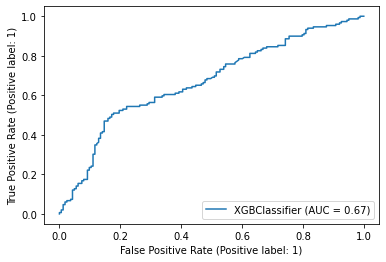

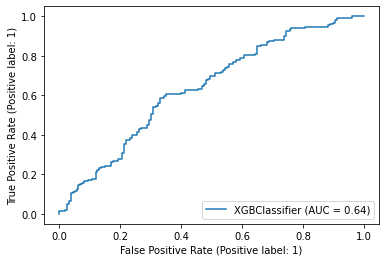

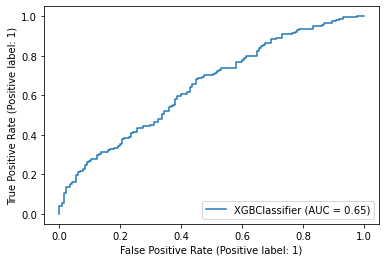

In [26]:
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
	# define the model
	model = XGBClassifier(objective= 'binary:logistic', random_state=42)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 750]
	space['max_depth'] = [3, 5, 10, 15]
	space['learning_rate'] = [0.3, 0.1, 0.01]
	space['colsample_bytree'] = [0.5, 0.8]
	# define search
	search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	roc_auc_score = result.best_score_
	print("best auc score is : ")
	print(roc_auc_score)
	best_auc.append(roc_auc_score)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# predict proba
	y_pred_proba = best_model.predict_proba(X_test)
	print(y_pred_proba)    
	predict_prob.append(y_pred_proba)
	# evaluate the model
	acc_on_test = accuracy_score(y_test, yhat)
	print("accuracy on test data: ")
	print(acc_on_test)
	# store the result
	# cm
	cm = confusion_matrix(y_test, yhat)
	# 
	print(cm)
	# class report
	classif_report = classification_report(y_test, yhat)
	print(classif_report)
	#
	RocCurveDisplay.from_estimator(best_model, X_test, y_test)
	# feature_importances_
	f_i = best_model.feature_importances_
	print("feature importances are: ")
	print(f_i)
	feature_imp.append(f_i)
	# best parameters
	print("best parametrs: ")    
	print(result.best_params_)

In [27]:
best_auc

[0.6089985512660646, 0.6569299405804813, 0.627298863428983]

In [34]:
round(mean(best_auc),2)

0.63

In [29]:
feature_imp

[array([0.01697703, 0.01534654, 0.04525469, 0.        , 0.01520888,
        0.01878519, 0.02541739, 0.02362782, 0.01304578, 0.0080893 ,
        0.02104161, 0.01758352, 0.01521334, 0.02691814, 0.00662265,
        0.01555373, 0.01944316, 0.0219367 , 0.01893668, 0.02362999,
        0.0226655 , 0.01622064, 0.01862177, 0.01924083, 0.03299082,
        0.03324655, 0.0320842 , 0.02498618, 0.04923549, 0.02101203,
        0.01887585, 0.014168  , 0.02758643, 0.03586132, 0.02526363,
        0.02843922, 0.02292769, 0.01216466, 0.02392348, 0.03237156,
        0.01877302, 0.01347786, 0.03030229, 0.0427708 , 0.01415811],
       dtype=float32),
 array([0.01265725, 0.01986304, 0.02349643, 0.01998869, 0.01909273,
        0.01853498, 0.0246877 , 0.0164408 , 0.02006874, 0.02009082,
        0.01966822, 0.02074184, 0.        , 0.02339878, 0.02384813,
        0.02283175, 0.02121187, 0.01887883, 0.01904559, 0.01460348,
        0.02789544, 0.02251388, 0.03115871, 0.01780738, 0.02749127,
        0.02266377, 0.02

In [30]:
df_FI_0 = pd.DataFrame(feature_imp[0], columns = ['first'])
df_FI_1 = pd.DataFrame(feature_imp[1], columns = ['second'])
df_FI_2 = pd.DataFrame(feature_imp[2], columns = ['third'])

In [31]:
df_final_FI = pd.concat([df_FI_0, df_FI_1, df_FI_2], axis = 1)

In [32]:
df_final_FI

,first,second,third
0,0.016977,0.012657,0.016883
1,0.015347,0.019863,0.012207
2,0.045255,0.023496,0.027974
3,0.000000,0.019989,0.020324
4,0.015209,0.019093,0.011240
5,0.018785,0.018535,0.022486
6,0.025417,0.024688,0.034757
7,0.023628,0.016441,0.020343
8,0.013046,0.020069,0.024057
9,0.008089,0.020091,0.023879


In [33]:
df_final_FI.to_csv("FI_values_cvd_death_only_pw.csv")

In [35]:
# pred prob

In [36]:
len(predict_prob)

3

In [37]:
df_predict_0 = pd.DataFrame(predict_prob[0], columns = ['first_0','first_1'])
df_predict_1 = pd.DataFrame(predict_prob[1], columns = ['second_0','second_1'])
df_predict_2 = pd.DataFrame(predict_prob[2], columns = ['third_0','third_1'])

In [38]:
df_final_pred = pd.concat([df_predict_0, df_predict_1, df_predict_2], axis = 1)

In [39]:
df_final_pred

,first_0,first_1,second_0,second_1,third_0,third_1
0,0.481192,0.518808,0.638541,0.361459,0.416094,0.583906
1,0.548064,0.451936,0.483163,0.516837,0.849909,0.150091
2,0.511968,0.488032,0.253677,0.746323,0.751838,0.248162
3,0.691905,0.308095,0.554787,0.445213,0.374521,0.625479
4,0.508626,0.491374,0.729751,0.270249,0.636533,0.363467
...,...,...,...,...,...,...
307,0.442982,0.557018,0.702657,0.297343,0.216976,0.783024
308,0.375704,0.624296,0.236951,0.763049,0.625164,0.374836
309,0.375482,0.624518,0.643972,0.356028,0.234318,0.765682
310,0.488546,0.511454,0.585967,0.414033,0.247591,0.752409


In [40]:
df_final_pred.to_csv("prob_values_cvd_death_only_pw.csv")

In [41]:
# sensitivity and specificity

In [42]:
# sensitivity for class '0' which is also specificity

In [43]:
sensitivity_class_zero = [0.60, 0.60, 0.65]

In [44]:
print("sensitivity of class zero: ", round(mean(sensitivity_class_zero),2))

sensitivity of class zero:  0.62


In [45]:
# sensitivity for class one

In [46]:
sensitivity_class_one = [0.63, 0.61, 0.52]

In [47]:
print("sensitivity of class one: ", round(mean(sensitivity_class_one),2))

sensitivity of class one:  0.59


In [1]:
# Getting AUC from outer loop, average over 3 folds

In [3]:
auc_outer_loop = [0.67, 0.64, 0.65]

In [4]:
auc_outer_loop_mean = round(mean(auc_outer_loop),2)

In [5]:
print(auc_outer_loop_mean)

0.65
